# EDSR (Enhanced deep superresolution) architecture


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

In [21]:
dataset_name = "div2k"

dataset, info = tfds.load(dataset_name, as_supervised=True, with_info=True)

In [22]:
print(info)

tfds.core.DatasetInfo(
    name='div2k',
    full_name='div2k/bicubic_x2/2.0.0',
    description="""
    DIV2K dataset: DIVerse 2K resolution high quality images as used for the
    challenges @ NTIRE (CVPR 2017 and CVPR 2018) and @ PIRM (ECCV 2018)
    """,
    config_description="""
    Uses bicubic_x2 data.
    """,
    homepage='https://data.vision.ee.ethz.ch/cvl/DIV2K/',
    data_path='/Users/isaacadoboe/tensorflow_datasets/div2k/bicubic_x2/2.0.0',
    file_format=tfrecord,
    download_size=4.68 GiB,
    dataset_size=4.68 GiB,
    features=FeaturesDict({
        'hr': Image(shape=(None, None, 3), dtype=uint8),
        'lr': Image(shape=(None, None, 3), dtype=uint8),
    }),
    supervised_keys=('lr', 'hr'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=800, num_shards=64>,
        'validation': <SplitInfo num_examples=100, num_shards=8>,
    },
    citation="""@InProceedings{Agustsson_2017_CVPR_Workshops,
    	author = {Agustsson, Eirikur and 

In [23]:
train_ds = dataset['train']
test_ds = dataset['validation']

In [24]:
# size of low-resolution and high-resolution images
for low_res, high_res in train_ds.take(1):
    print("Low resolution image shape:", low_res.shape)
    print("High resolution image shape:", high_res.shape)
    print("\nScale factor:", high_res.shape[0]/low_res.shape[0])


Low resolution image shape: (678, 1020, 3)
High resolution image shape: (1356, 2040, 3)

Scale factor: 2.0


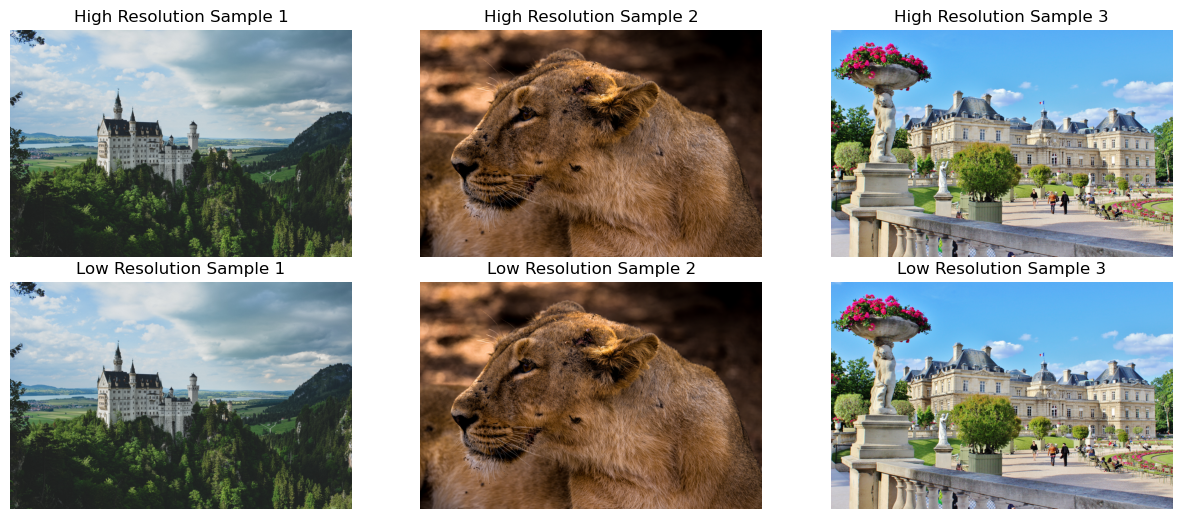

In [25]:
# Take a few samples from the dataset
samples = train_ds.take(3)

# Plot the samples
plt.figure(figsize=(15, 12))
for i, (low_res, high_res) in enumerate(samples):
    plt.subplot(1, 3, i+1)
    plt.imshow(low_res)
    plt.axis('off')
    plt.title(f'Low Resolution Sample {i+1}')
    
    plt.subplot(2, 3, i+1)
    plt.imshow(high_res)
    plt.axis('off')
    plt.title(f'High Resolution Sample {i+1}')
plt.show()

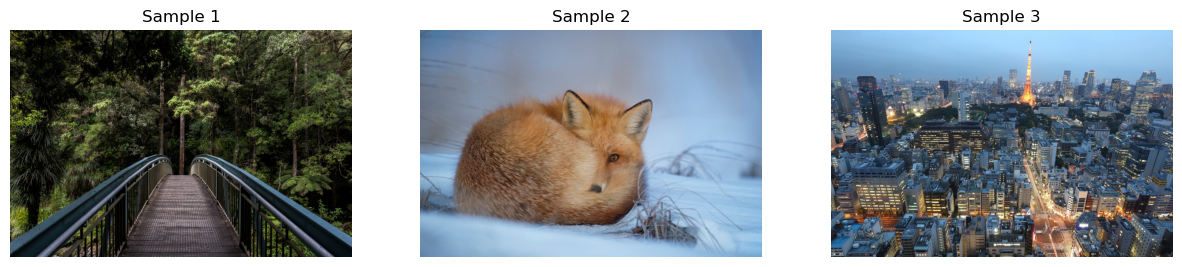

In [26]:
# Take a few samples from the dataset
samples = test_ds.take(3)

# Plot the samples
plt.figure(figsize=(15, 5))
for i, (low_res, high_res) in enumerate(samples):
    plt.subplot(1, 3, i+1)
    plt.imshow(low_res)
    plt.axis('off')
    plt.title(f'Sample {i+1}')
plt.show()